In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_tensor(file):
    
    with open(file, "rb") as f:
        binary_data = f.read()

    magic_number, ndims, dtype = np.frombuffer(binary_data, np.uint32, count=3, offset=0)
    assert magic_number == 0xFCCFE2E2, f"{file} not a tensor file."
    
    dims = np.frombuffer(binary_data, np.uint32, count=ndims, offset=3 * 4)

    if dtype == 0:
        np_dtype = np.float32
    elif dtype == 1:
        np_dtype = np.float16
    else:
        assert False, f"Unsupport dtype = {dtype}, can not convert to numpy dtype"
        
    return np.frombuffer(binary_data, np_dtype, offset=(ndims + 3) * 4).reshape(*dims)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


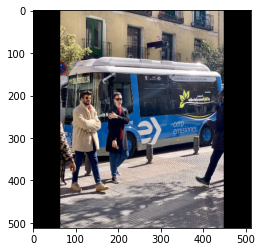

In [5]:
affined_arr = load_tensor("affined_result_gpu.tensor")
mean = np.array((0.408, 0.447, 0.470)).reshape(1,1,3)
std  = np.array((0.289, 0.274, 0.278)).reshape(1,1,3)

affined_img = affined_arr[0].transpose(1,2,0) * std + mean

plt.imshow(affined_img[...,::-1])